In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('porter.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


## Define problem statement and perform EDA 

Porter is India's Largest Marketplace for Intra-City Logistics. 

Porter works with a wide range of restaurants to deliver their items directly to the people. 

It has a number of delivery partners available for delivering food from various restaurants 
- They wants to get an <b>estimated delivery time</b> that they can provide the customers based on :
    
        - what they are ordering 
        - from where  
        - also the delivery partners.

### Observations on shape of data and data types of all attributes.

In [3]:
print(f"The Dataset has : \n  {df.shape[0]} rows\n  {df.shape[1]} columns")

The Dataset has : 
  197428 rows
  14 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

### Missing Value Detection


In [5]:
df.isna().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [6]:
print(f"Total missing values in the dataset: {df.isna().sum().sum()}")

Total missing values in the dataset: 55535


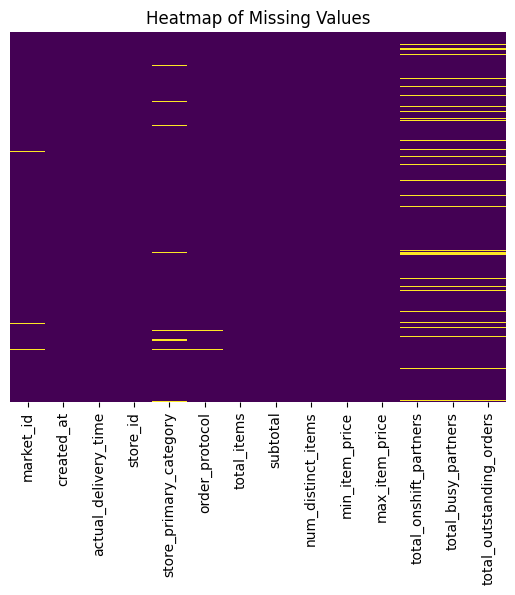

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()


### Outlier Detection 


In [8]:
numerical_data=df.select_dtypes(include=['number'])
numerical_data.columns

Index(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

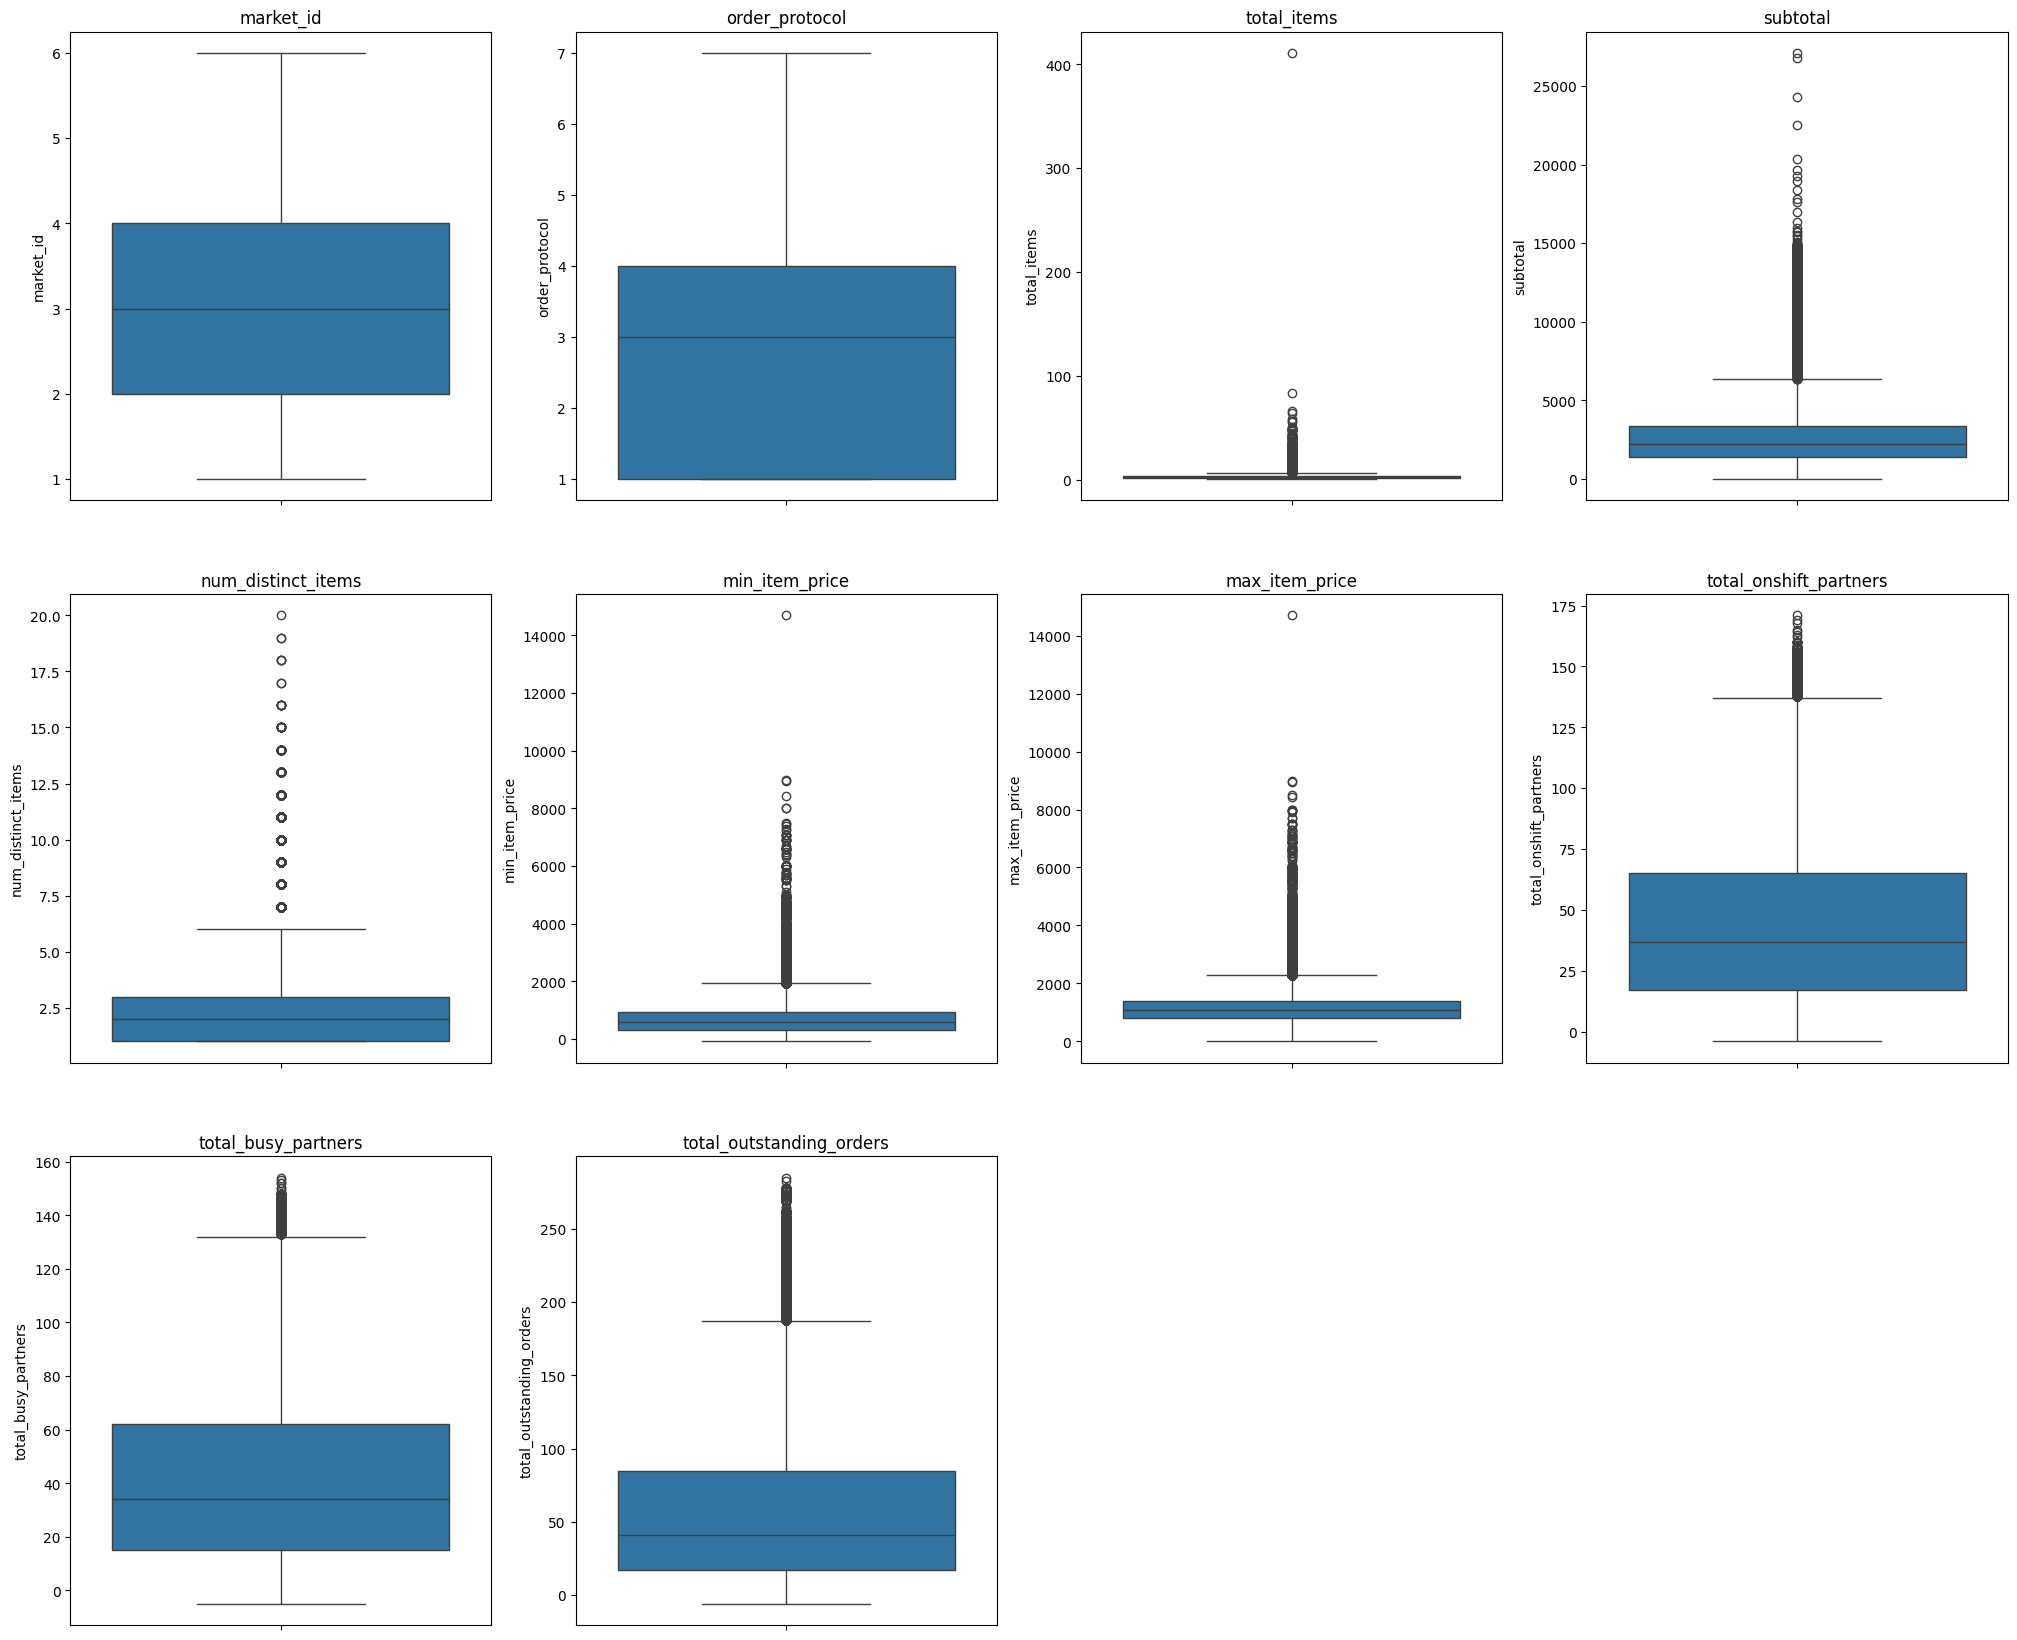

In [9]:
i = 1
plt.figure(figsize=(25, 28))
for col in  numerical_data.columns:
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
    plt.title(col)
    i += 1
plt.show()


Outliers found in All the numerical columns except the first 2

In [10]:
outlier_features = numerical_data.drop(columns=["market_id", "order_protocol"])

- Checking the statistical Distribution of the Features

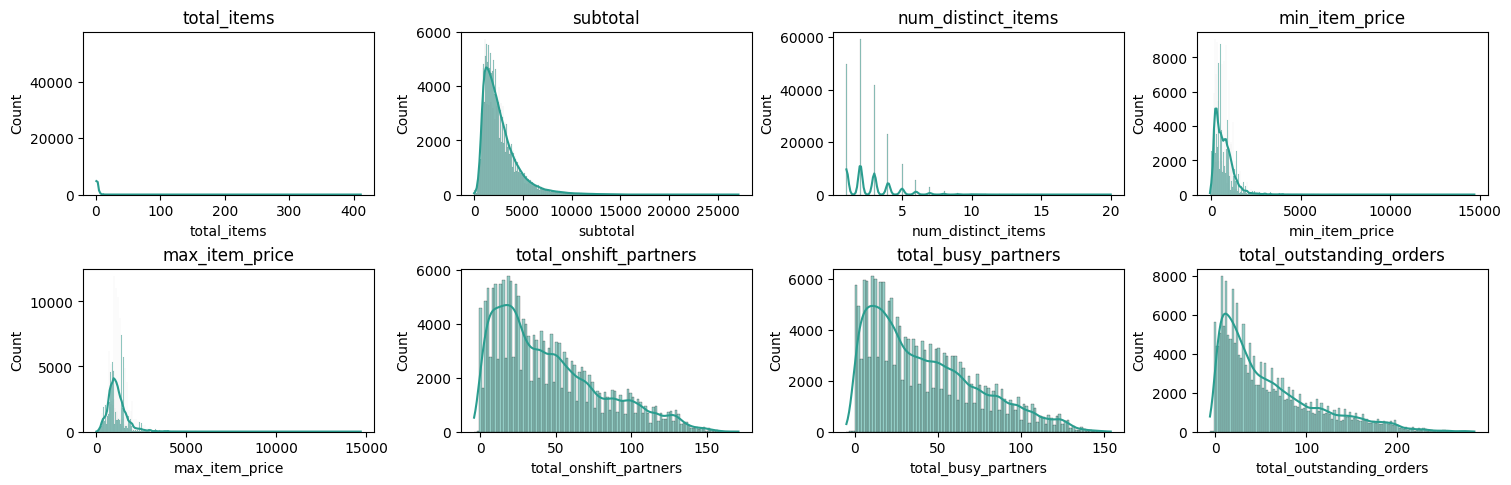

In [11]:
plt.figure(figsize=(15, 8), layout="constrained", frameon=True)
i = 1
for col in outlier_features:
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color="#2a9d8f")
    plt.title(col)
    i += 1
plt.show()


### Data Visualization for better understanding


In [ ]:
sns.countplot(df['store_id'])
plt.show()

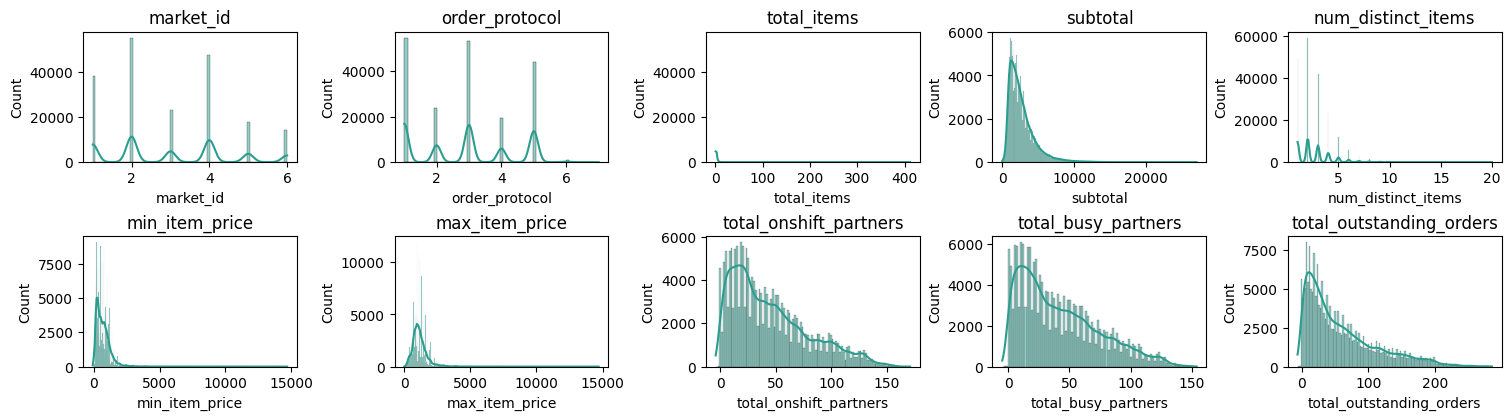

In [29]:
plt.figure(figsize=(15, 8), layout="constrained", frameon=True)
i = 1
for col in numerical_data.columns:
    plt.subplot(5, 5, i)
    sns.histplot(df[col], kde=True, color="#2a9d8f")
    plt.title(col)
    i += 1
plt.show()

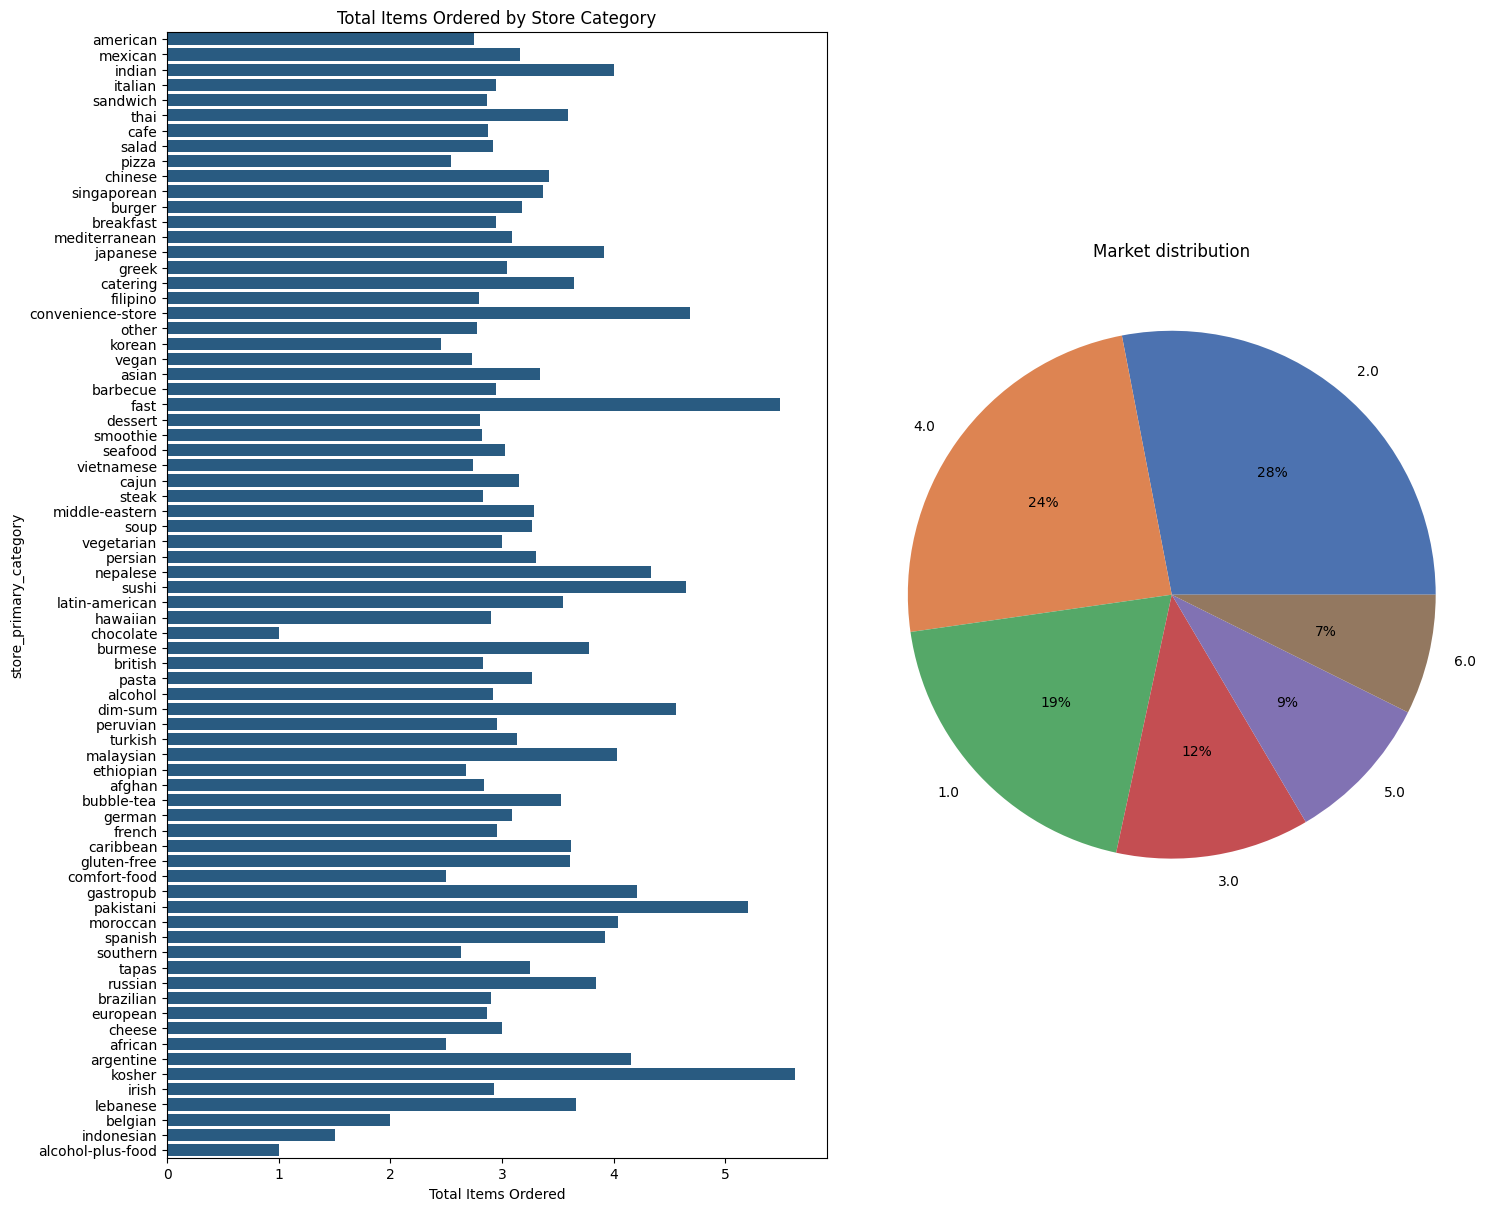

In [31]:
plt.figure(figsize=(15, 12), layout="constrained", frameon=True)

plt.subplot(1,2,1)
sns.barplot(y="store_primary_category", x="total_items", data=df, errorbar=None, color="#1b5d8f")
plt.xlabel("Total Items Ordered")
plt.title("Total Items Ordered by Store Category")

plt.subplot(1,2,2)
plt.pie(df['market_id'].value_counts().values, labels=df['market_id'].value_counts().index, colors=sns.color_palette('deep'), autopct='%.0f%%') 
plt.title('Market distribution')

plt.show()

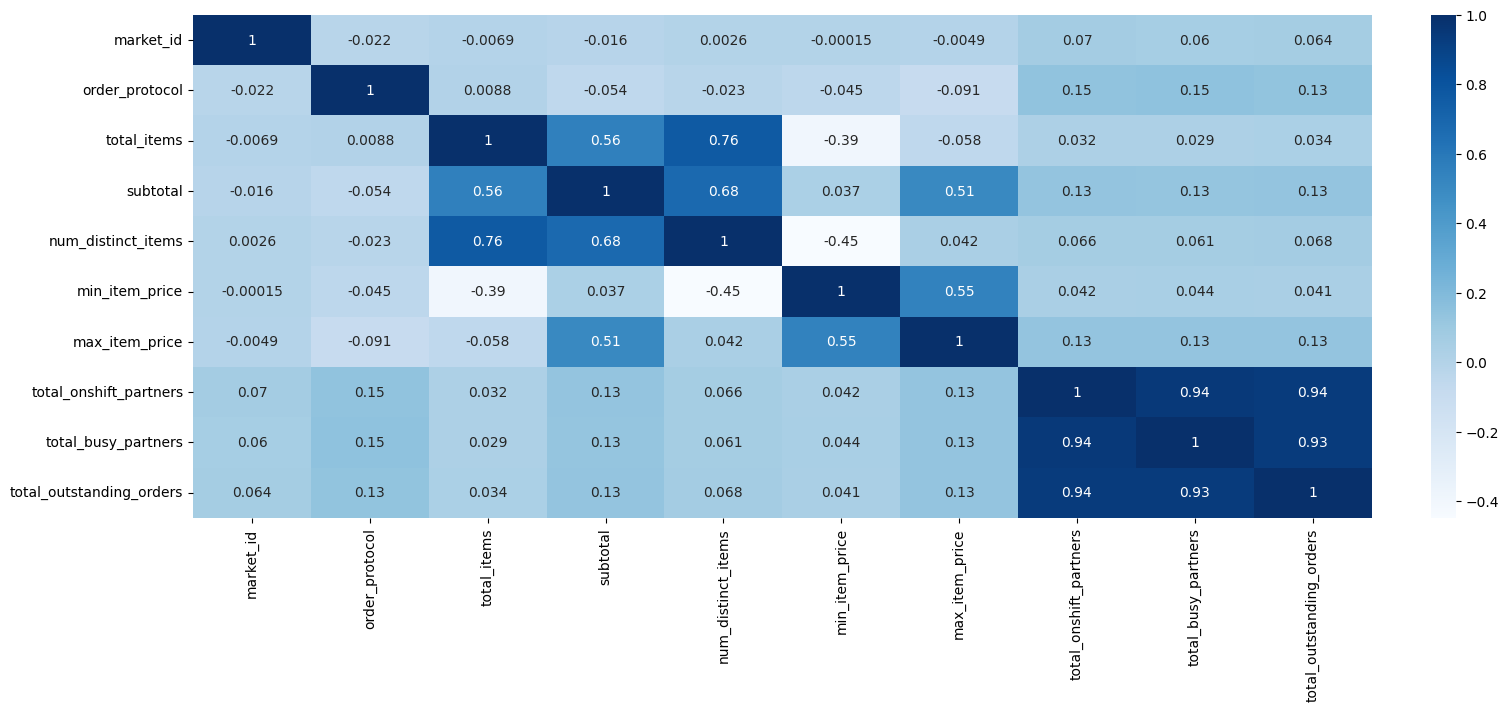

In [20]:
plt.figure(figsize=(15, 7), layout="constrained")
sns.heatmap(data=numerical_data.corr(), annot=True, cmap="Blues")
plt.show()


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\P

<Figure size 1000x600 with 0 Axes>

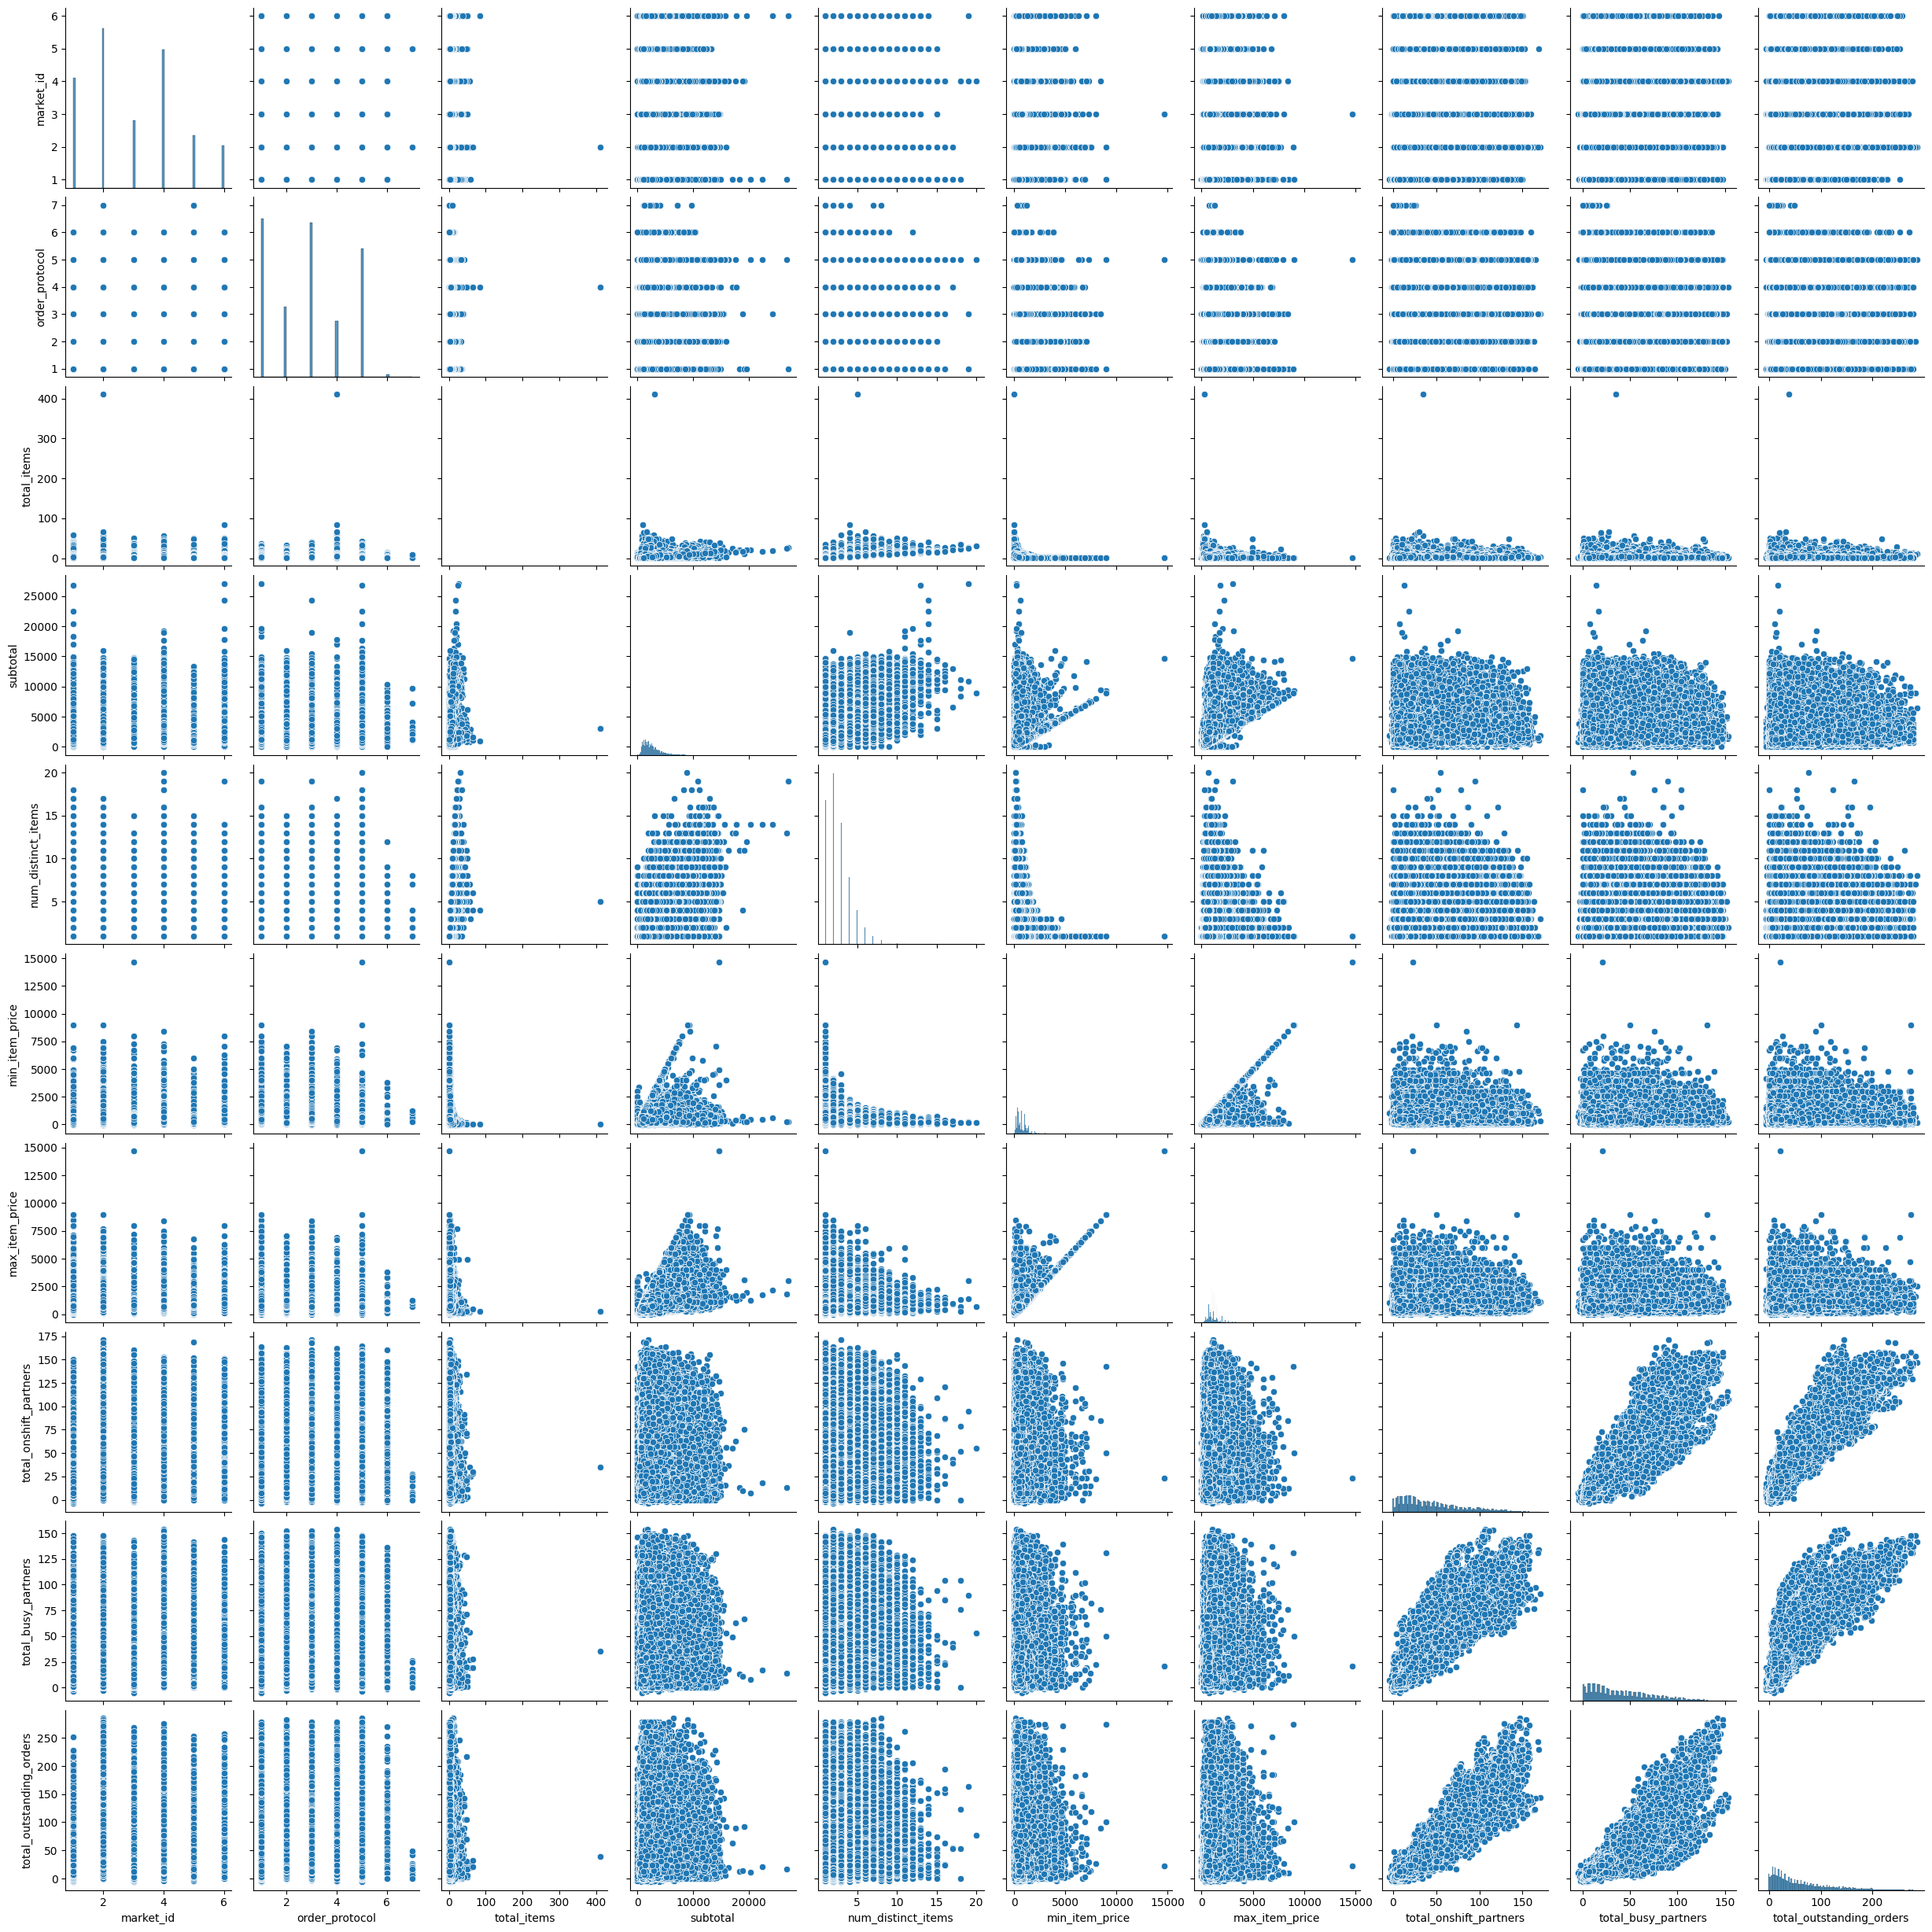

In [ ]:
plt.figure(figsize=(10, 6))
sns.pairplot(
    df,
    # palette="Set2",
)
plt.show()

## Data preprocessing and feature engineering 


### Creating the target column: time taken in each delivery from order timestamp (created_at) and delivery timestamp (actual_delivery_time). Get delivery time in minutes (Hint: use pandas datetime data type)


### Missing Value and Outlier Treatment


### Encoding Categorical Columns


### Feature Scaling



## Model building with hyperparameter tuning using TensorFlow 

### Regression Model using neural networks 


### Defining NN architecture


### Trying different combinations and hyperparameters


### Model training


## Evaluation 


### Comparison on the performance of the model using training, validation and test data


### Comments on insights & recommendations